# Task 4
Implementate un programma che, data una cartella di immagini e dati l’identificatore ID di una immagine, e un valore “k”, restituisca e visualizzi le k immagini piu’ simili a quella di identificatore ID sulla base di tutti i corrispondenti descrittori visuali.
Per ciascuna immagine restituita, restituire anche il matching score globale, oltre al contributo allo stesso da parte dei singoli modelli visuali utilizzati.

In [9]:
from ipynb.fs.full.task1_new import *
from ipynb.fs.full.task2 import *
from ipynb.fs.full.task3 import *

import numpy as np
from operator import itemgetter

from PIL import Image
from numpy import asarray
from scipy.stats import skew

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [10]:
HOGdescriptor = dictionaryOfHOGDescriptors
LBPdescriptor = dictionaryOfLBPDescriptors
colorMomentsdescriptor = dictionaryOfColorMomentsDescriptors

### Implementazione che calcola la distanza tra l'immagine in input e tutte le altre della cartella sulla base di tutti e 3 i decrittori implementati e restituisce un descrittore unico

- Il descrittore unico restituito dell'immagine Y è un vettore formato da 3 elementi:
    - distanza tra l'immagine in input e l'immagine Y secondo i color moments
    - distanza tra l'immagine in input e l'immagine Y secondo i le features LBP
    - distanza tra l'immagine in input e l'immagine Y secondo le HOG features

In [11]:
def calculateDistanceFromOtherImages(imageID):
    
    # ------------------------------------------------------------------------------------------------------------------------------------

    # COLOR MOMENTS

    colorMomentsOfInputImage = colorMomentsdescriptor[imageID] # recupero il descrittore dell'immagine di ID image ID
    # il descrittore contiene mean, std e skewness

    # lo trasformo in numpy array
    numpyArr = np.array(colorMomentsOfInputImage)

    dictionaryOfDistancesColorMoments = {}

    # calcolo la distanza tra l'immagine in input tra tutte quelle presenti nella cartella usando i Color Moments
    for (key, v) in sorted(colorMomentsdescriptor.items()):
        numpyArrOfV = np.array(v)
        dist = np.linalg.norm(numpyArr - numpyArrOfV)   # calcolo la distanza euclidea tra i due descrittori
        dictionaryOfDistancesColorMoments[key] = dist   # distanza tra l'immmagine in input e quella di nome key ('image-N')

    # ------------------------------------------------------------------------------------------------------------------------------------

    # HOG FEATURES
    
    HOGOfInputImage = HOGdescriptor[imageID] # recupero il descrittore dell'immagine di ID image ID
    # il descrittore contiene mean, std e skewness

    # lo trasformo in numpy array
    numpyArr = np.array(HOGOfInputImage)

    dictionaryOfDistancesHOG = {}

    # calcolo la distanza tra l'immagine in input tra tutte quelle presenti nella cartella usando le HOG features
    for (key, v) in sorted(HOGdescriptor.items()):
        numpyArrOfV = np.array(v)
        dist = np.linalg.norm(numpyArr - numpyArrOfV)   # calcolo la distanza euclidea tra i due descrittori
        dictionaryOfDistancesHOG[key] = dist   # distanza tra l'immmagine in input e quella di nome key ('image-N')

    # ------------------------------------------------------------------------------------------------------------------------------------
    
    # LBP FEATURES
    
    LBPOfInputImage = LBPdescriptor[imageID] # recupero il descrittore dell'immagine di ID image ID
    # il descrittore contiene mean, std e skewness

    # lo trasformo in numpy array
    #numpyArr = np.array(LBPOfInputImage)

    dictionaryOfDistancesLBP = {}

    # calcolo la distanza tra l'immagine in input tra tutte quelle presenti nella cartella usando il descrittore LBP
    for (key, v) in sorted(LBPdescriptor.items()):
        #numpyArrOfV = np.array(v)
        dist = np.linalg.norm(LBPOfInputImage - v)   # calcolo la distanza euclidea tra i due descrittori
        dictionaryOfDistancesLBP[key] = dist   # distanza tra l'immmagine in input e quella di nome key ('image-N')

    # creo un dizionario chiave valore:
    # 'image-11' : [3.5, 0, 9] indica che l'immagine in input dista 3.5 secondo i color moments, 0 per lbp e 9 per HOG dall'immagine in input
    dictionaryOfDistancesFromInputImage = {}

    for i in range(0, len(dir_list)):
        # TODO: sistemare il calcolo della distanza su LPB: dictionaryOfDistancesLBP[dir_list[i]]
        distance = [dictionaryOfDistancesColorMoments[dir_list[i]], dictionaryOfDistancesLBP[dir_list[i]], dictionaryOfDistancesHOG[dir_list[i]]]
        dictionaryOfDistancesFromInputImage[dir_list[i]] = distance

    #print(dictionaryOfDistancesFromInputImage)
    #print(dictionaryOfDistancesLBP)

    return dictionaryOfDistancesFromInputImage

In [12]:
dictionaryOfDistancesFromImage = calculateDistanceFromOtherImages('image-0.png')

### Implementazione di una funzione che restituisce le K immagini più simili a quella in input tenendo in considerazione tutti e 3 i descrittori implementati

In [13]:
def calculateKsimilarImages(imageID, k):
    vectorOfDistancesOfInputImage = dictionaryOfDistancesFromImage[imageID]
    numpyArr = np.array(vectorOfDistancesOfInputImage)

    dictionaryOfDistances = {}

    for (key, v) in sorted(dictionaryOfDistancesFromImage.items()):
        numpyArrOfV = np.array(v)

        dist = np.linalg.norm(numpyArr - numpyArrOfV)   # calcolo la distanza euclidea tra i due descrittori
        dictionaryOfDistances[key] = dist

    print(dictionaryOfDistances)

    sortedDistances = sorted(dictionaryOfDistances.items(), key = itemgetter(1))

    firstK = sortedDistances[:int(k)]

    print(firstK)

    return firstK


In [14]:
kSimilarImages = calculateKsimilarImages('image-0.png', 20)

{'image-0.png': 0.0, 'image-1.png': 499.1522293059643, 'image-10.png': 404.6393781205419, 'image-100.png': 384.2108420447256, 'image-101.png': 404.220766989506, 'image-102.png': 372.1504620898588, 'image-103.png': 427.83155572520224, 'image-104.png': 422.7619384638917, 'image-105.png': 370.68459497725036, 'image-106.png': 388.38531527336414, 'image-107.png': 421.31918350533283, 'image-108.png': 453.0509599204665, 'image-109.png': 390.94642536428944, 'image-11.png': 412.5306560074696, 'image-110.png': 304.5267616067731, 'image-111.png': 438.86000634054477, 'image-112.png': 477.99810576003927, 'image-113.png': 392.6651158244568, 'image-114.png': 429.1035993548701, 'image-115.png': 317.8412531587864, 'image-116.png': 435.18411043903046, 'image-117.png': 414.40508704684805, 'image-118.png': 360.31514826311064, 'image-119.png': 349.25899447542906, 'image-12.png': 444.8999221038409, 'image-120.png': 409.6575206587112, 'image-121.png': 395.43486217737086, 'image-122.png': 402.87105765198146, 

5
{'image-0.png': 0.0, 'image-1.png': 499.1522293059643, 'image-10.png': 404.6393781205419, 'image-100.png': 384.2108420447256, 'image-101.png': 404.220766989506, 'image-102.png': 372.1504620898588, 'image-103.png': 427.83155572520224, 'image-104.png': 422.7619384638917, 'image-105.png': 370.68459497725036, 'image-106.png': 388.38531527336414, 'image-107.png': 421.31918350533283, 'image-108.png': 453.0509599204665, 'image-109.png': 390.94642536428944, 'image-11.png': 412.5306560074696, 'image-110.png': 304.5267616067731, 'image-111.png': 438.86000634054477, 'image-112.png': 477.99810576003927, 'image-113.png': 392.6651158244568, 'image-114.png': 429.1035993548701, 'image-115.png': 317.8412531587864, 'image-116.png': 435.18411043903046, 'image-117.png': 414.40508704684805, 'image-118.png': 360.31514826311064, 'image-119.png': 349.25899447542906, 'image-12.png': 444.8999221038409, 'image-120.png': 409.6575206587112, 'image-121.png': 395.43486217737086, 'image-122.png': 402.87105765198146

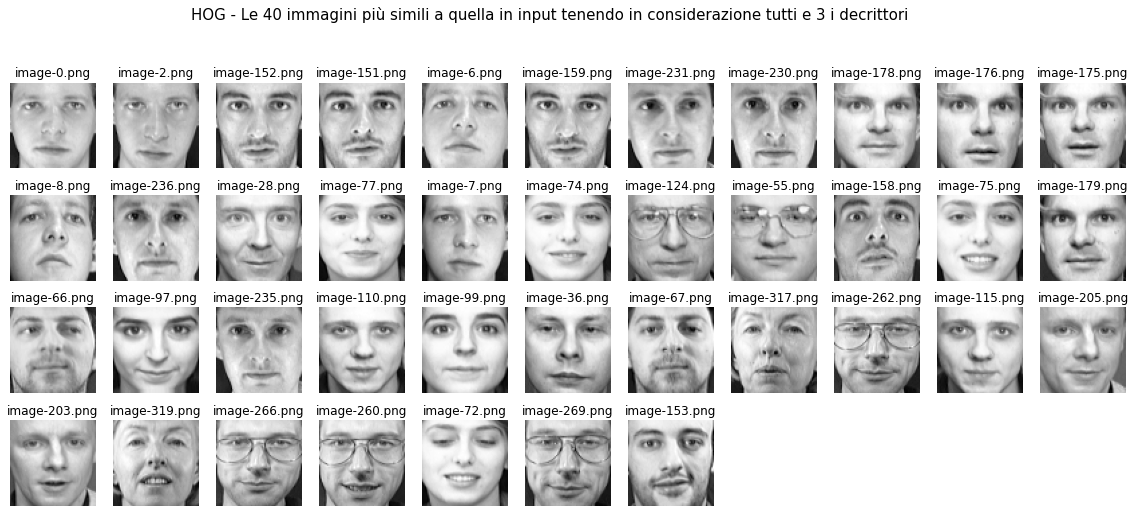

In [15]:
import math
# numero di immagini simili che vogliamo ottenere
k = 40

w = 10
h = 10
columns = 11    # le colonne sono 11 per riga
rows = math.trunc(k / 10) + 1

print(rows)

fig = plt.figure(figsize=(20, 10))
fig.suptitle('HOG - ' + 'Le ' + str(k) + ' immagini più simili a quella in input tenendo in considerazione tutti e 3 i decrittori', fontsize=15)
# plt.axis('off')
currentIndex = 1

kSimilarImagesOfColMom = calculateKsimilarImages('image-0.png', k)
#print(kSimilarImagesOfColMom)

for j in range(len(kSimilarImagesOfColMom)):
    imageName = kSimilarImagesOfColMom[j][0]
    # load the image
    image = Image.open('./olivetti_PNG_master/images/' + imageName)

    fig.add_subplot(rows, columns, currentIndex)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(imageName)

    currentIndex += 1

plt.show()

In [16]:
# for i in range(0, len(kSimilarImages)):
#     imageName = kSimilarImages[i][0]
#     print("Nome dell'immagine: ", kSimilarImages[i][0])
#     print("Vettore delle distanze dall'immagine: ", dictionaryOfDistancesFromImage[imageName])
#     print("Distanza dall'immagine in input: ", kSimilarImages[i][1])

#     # load the image
#     image = Image.open('./olivetti_PNG_master/images/' + imageName)
#     # convert image to numpy array
#     # data = asarray(image)

#     # display the array of pixels as an image
#     # il parametro cmap serve a specificare il tipo di colormap che vogliamo utilizzare, per questo motivo abbiamo specificato gray per la scala di grigi
#     pyplot.imshow(image, cmap='gray')
#     pyplot.show()